# Genetic Algorihtm

In [4]:
import numpy as np
np.random.seed(0)

number_of_cities = 20

# randomly generate coordinates for each city
coordinates = np.random.randint(0, 100, (number_of_cities, 2))


Generation 0 - Best Distance: 716.0603713826094
Generation 50 - Best Distance: 366.4814077050409
Generation 100 - Best Distance: 345.28085609451267
Generation 150 - Best Distance: 345.28085609451267
Generation 200 - Best Distance: 345.28085609451267
Generation 250 - Best Distance: 345.28085609451267
Generation 300 - Best Distance: 345.28085609451267
Generation 350 - Best Distance: 345.28085609451267
Generation 400 - Best Distance: 345.28085609451267
Generation 450 - Best Distance: 345.28085609451267
Optimal Path: [17, 10, 3, 6, 12, 2, 19, 18, 0, 15, 11, 13, 4, 8, 9, 16, 5, 14, 1, 7]
Optimal Distance: 345.28085609451267


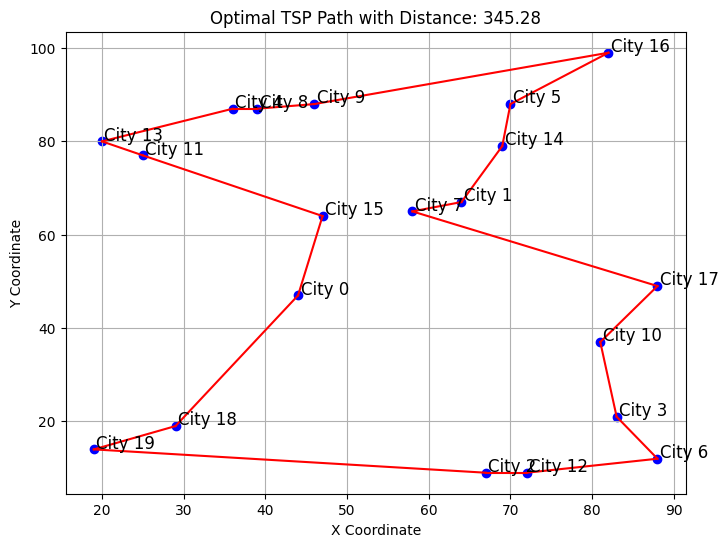

In [5]:
import random
import matplotlib.pyplot as plt

# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Calculate the total distance of a path
def calculate_total_distance(path, coordinates):
    return sum(euclidean_distance(coordinates[path[i]], coordinates[path[i + 1]]) 
               for i in range(len(path) - 1)) + euclidean_distance(coordinates[path[-1]], coordinates[path[0]])

# Generate initial population
def initialize_population(pop_size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(pop_size)]

# Selection - Select parents using tournament selection
def selection(population, coordinates, tournament_size=5):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda path: calculate_total_distance(path, coordinates))
    return tournament[0]  # Return the best individual in the tournament

# Crossover - Ordered Crossover (OX)
def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child = [None] * len(parent1)
    child[start:end] = parent1[start:end]
    
    # Fill remaining cities from parent2
    fill_pos = end
    for city in parent2:
        if city not in child:
            if fill_pos >= len(child):
                fill_pos = 0
            child[fill_pos] = city
            fill_pos += 1
    
    return child

# Mutation - Swap Mutation
def mutate(path, mutation_rate=0.01):
    for i in range(len(path)):
        if random.random() < mutation_rate:
            swap_idx = random.randint(0, len(path) - 1)
            path[i], path[swap_idx] = path[swap_idx], path[i]

# Evolve the population
def evolve_population(population, coordinates, mutation_rate=0.01, elite_size=2):
    new_population = sorted(population, key=lambda path: calculate_total_distance(path, coordinates))[:elite_size]
    
    # Generate the rest of the new population
    while len(new_population) < len(population):
        parent1 = selection(population, coordinates)
        parent2 = selection(population, coordinates)
        child = crossover(parent1, parent2)
        mutate(child, mutation_rate)
        new_population.append(child)
    
    return new_population

# Genetic Algorithm function
def genetic_algorithm(coordinates, pop_size=100, generations=500, mutation_rate=0.01):
    num_cities = len(coordinates)
    population = initialize_population(pop_size, num_cities)
    best_path = None
    best_distance = float('inf')
    
    for generation in range(generations):
        population = evolve_population(population, coordinates, mutation_rate)
        current_best = min(population, key=lambda path: calculate_total_distance(path, coordinates))
        current_distance = calculate_total_distance(current_best, coordinates)
        
        if current_distance < best_distance:
            best_distance = current_distance
            best_path = current_best
        
        if generation % 50 == 0:  # Print progress every 50 generations
            print(f"Generation {generation} - Best Distance: {best_distance}")
    
    return best_path, best_distance

# Visualization function
def plot_tsp_path(optimal_path, coordinates):
    plt.figure(figsize=(8, 6))
    for i, coord in enumerate(coordinates):
        plt.scatter(coord[0], coord[1], color='blue')
        plt.text(coord[0] + 0.3, coord[1] + 0.3, f"City {i}", fontsize=12)

    for i in range(len(optimal_path)):
        start_city = optimal_path[i]
        end_city = optimal_path[(i + 1) % len(optimal_path)]
        plt.plot([coordinates[start_city][0], coordinates[end_city][0]], 
                 [coordinates[start_city][1], coordinates[end_city][1]], 'r-')

    plt.title(f"Optimal TSP Path with Distance: {calculate_total_distance(optimal_path, coordinates):.2f}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.show()


# Run the Genetic Algorithm
optimal_path, optimal_distance = genetic_algorithm(coordinates, pop_size=100, generations=500, mutation_rate=0.01)
print(f"Optimal Path: {optimal_path}")
print(f"Optimal Distance: {optimal_distance}")

# Plot the result
plot_tsp_path(optimal_path, coordinates)
